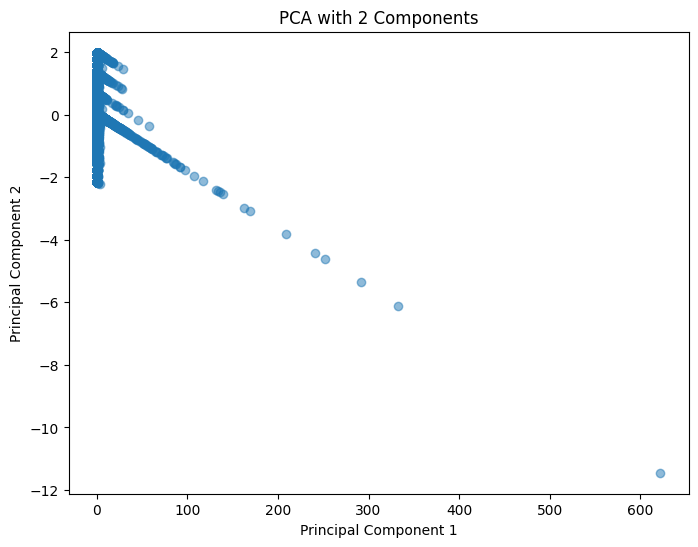

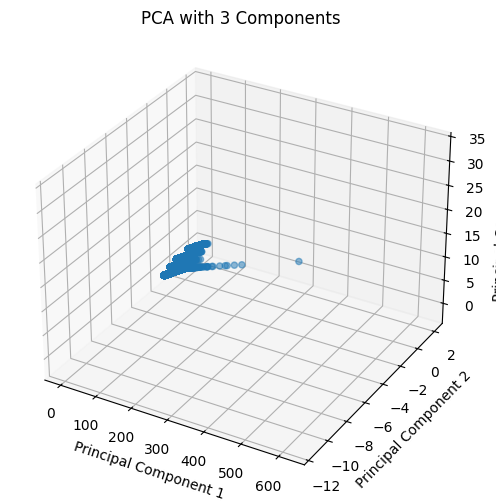

Variance retained with 2 components: 76.94%
Variance retained with 3 components: 99.67%
Number of components needed for 95% variance: 3
Top 3 eigenvalues: [1.99050667 1.08709311 0.90918466]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data_path = 'fixed.csv'
df = pd.read_csv(data_path)

# Drop non-numeric columns if any
numeric_df = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(scaled_data)
explained_variance_2 = np.sum(pca_2.explained_variance_ratio_) * 100

# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(scaled_data)
explained_variance_3 = np.sum(pca_3.explained_variance_ratio_) * 100

# Find the number of components needed for 95% variance
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Extract top 3 eigenvalues
eigenvalues = pca_full.explained_variance_[:3]

# Plot 2D PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_2_result[:,0], pca_2_result[:,1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.show()

# Plot 3D PCA
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_result[:,0], pca_3_result[:,1], pca_3_result[:,2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA with 3 Components')
plt.show()

# Print results
print(f'Variance retained with 2 components: {explained_variance_2:.2f}%')
print(f'Variance retained with 3 components: {explained_variance_3:.2f}%')
print(f'Number of components needed for 95% variance: {n_components_95}')
print(f'Top 3 eigenvalues: {eigenvalues}')


In [3]:
# Find the number of components needed for 95% variance
pca_full = PCA()
pca_full.fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f'Number of components needed for 95% variance: {n_components_95}')


Number of components needed for 95% variance: 3
